# Introduction

This project is going to address the most proper strategy for preventing customers from churning. By the end of this project, we will calculate how many potentially churning customers should we treat to retain the most optimum profit.

In this dataset we will be using these features:

1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female

3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No

4. Partner: Indicate if the customer has a partner: Yes, No

5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

6. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

8. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

9. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

12. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

13. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

21. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

22. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

# Importing Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

# Labeling Target

In [2]:
df = pd.read_csv('1699606352893-TelcoCustomerChurn.csv')
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop('customerID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [7]:
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)

In [8]:
df_cat=df.drop(['SeniorCitizen','Partner','Dependents','tenure','MultipleLines',
           'OnlineSecurity','MonthlyCharges','TotalCharges'],axis=1)
df_cat.head()

,gender,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,DSL,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,Male,1,DSL,0,1,0,0,0,One year,0,Mailed check,0
2,Male,1,DSL,1,0,0,0,0,Month-to-month,1,Mailed check,1
3,Male,0,DSL,0,1,1,0,0,One year,0,Bank transfer (automatic),0
4,Female,1,Fiber optic,0,0,0,0,0,Month-to-month,1,Electronic check,1


In [9]:
def proportional_aggregation(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['proportional'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

def plot_prop(prop_agg,y,x):
  g = sns.FacetGrid(
    data = prop_agg,
    col = x,
    aspect = 2)
  g.map(sns.barplot, y, "proportional");

   Churn  gender  size  proportional
0      0  Female  2549      0.492656
1      0    Male  2625      0.507344
2      1  Female   939      0.502408
3      1    Male   930      0.497592


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


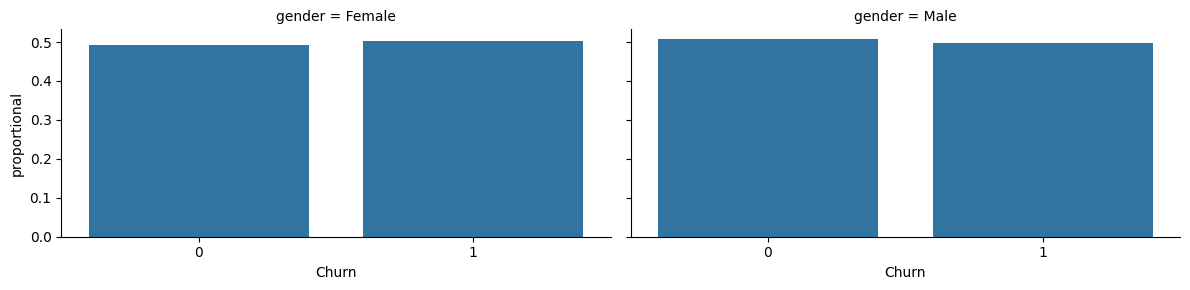

In [10]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[0])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[0])

   Churn  PhoneService  size  proportional
0      0             0   512      0.098956
1      0             1  4662      0.901044
2      1             0   170      0.090958
3      1             1  1699      0.909042


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


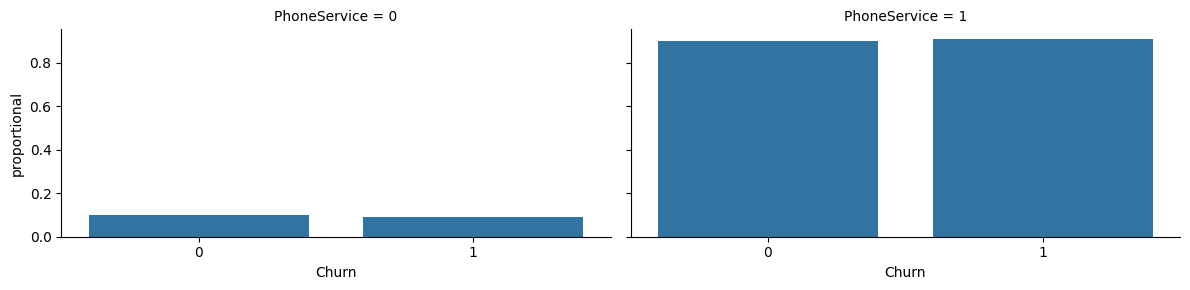

In [11]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[1])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[1])

   Churn InternetService  size  proportional
0      0             DSL  1962      0.379204
1      0     Fiber optic  1799      0.347700
2      0              No  1413      0.273096
3      1             DSL   459      0.245586
4      1     Fiber optic  1297      0.693954
5      1              No   113      0.060460


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


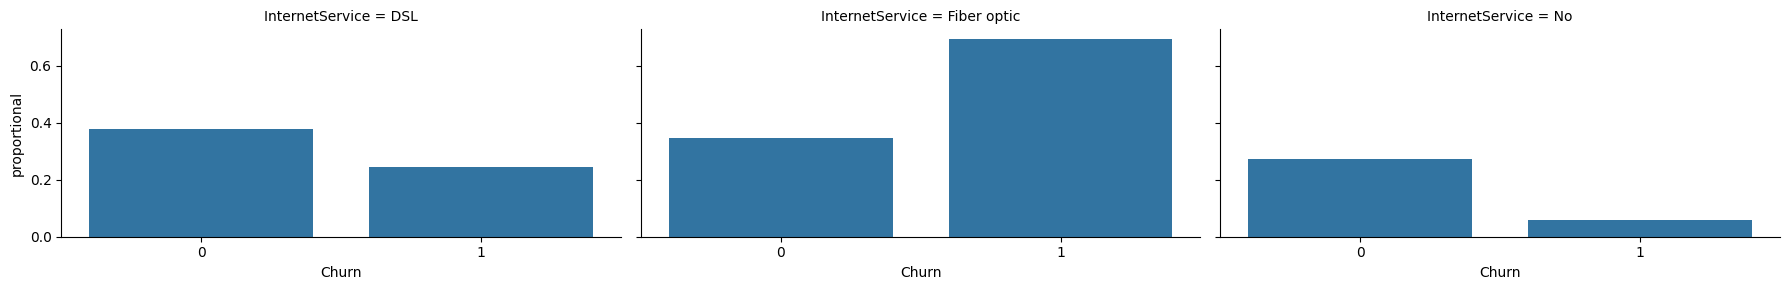

In [12]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[2])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[2])

   Churn  OnlineBackup  size  proportional
0      0             0  3268      0.631620
1      0             1  1906      0.368380
2      1             0  1346      0.720171
3      1             1   523      0.279829


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


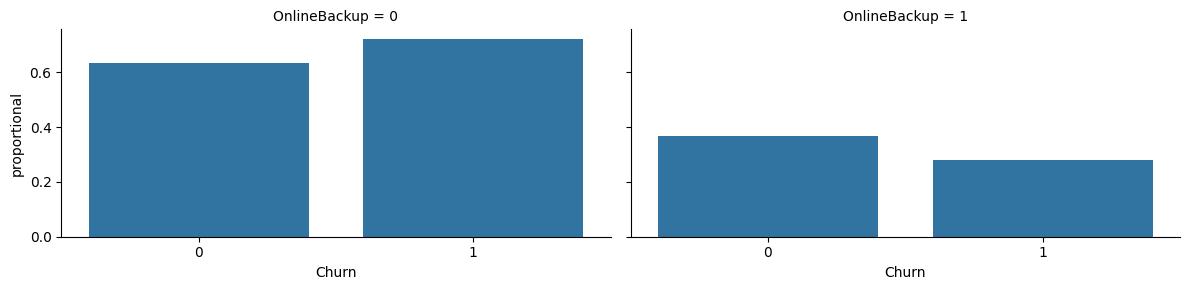

In [13]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[3])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[3])

   Churn  DeviceProtection  size  proportional
0      0                 0  3297      0.637225
1      0                 1  1877      0.362775
2      1                 0  1324      0.708400
3      1                 1   545      0.291600


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


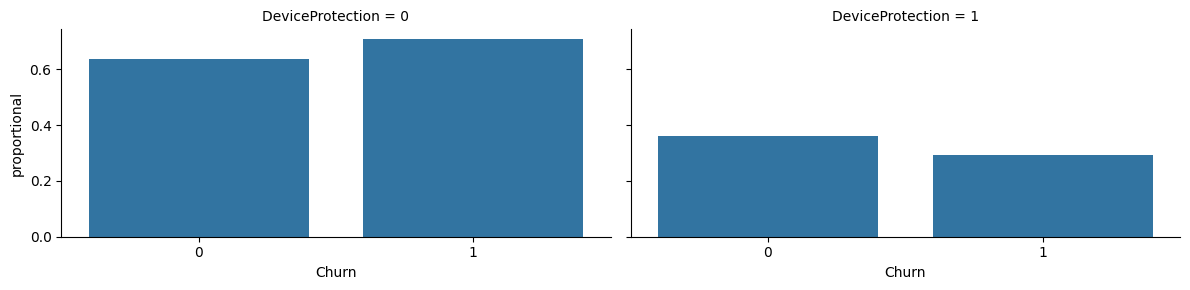

In [14]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[4])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[4])

   Churn  TechSupport  size  proportional
0      0            0  3440      0.664863
1      0            1  1734      0.335137
2      1            0  1559      0.834136
3      1            1   310      0.165864


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


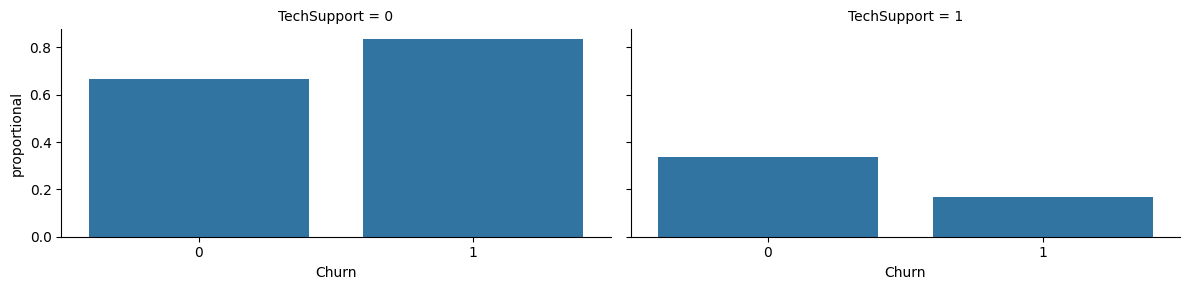

In [15]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[5])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[5])

   Churn  StreamingTV  size  proportional
0      0            0  3281      0.634132
1      0            1  1893      0.365868
2      1            0  1055      0.564473
3      1            1   814      0.435527


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


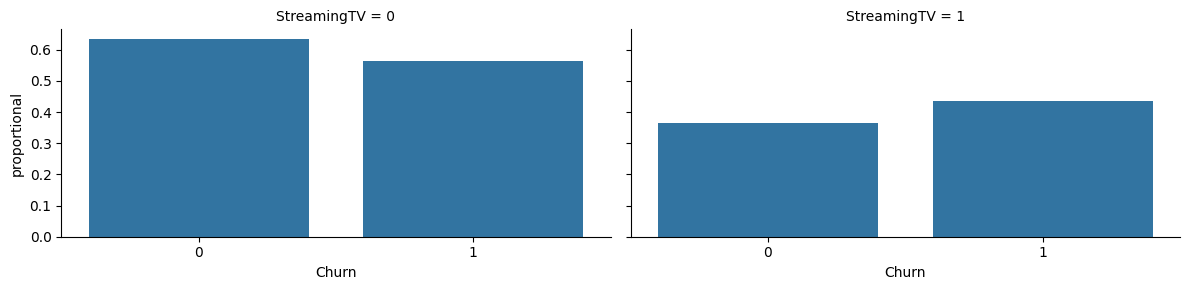

In [16]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[6])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[6])

   Churn  StreamingMovies  size  proportional
0      0                0  3260      0.630073
1      0                1  1914      0.369927
2      1                0  1051      0.562333
3      1                1   818      0.437667


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


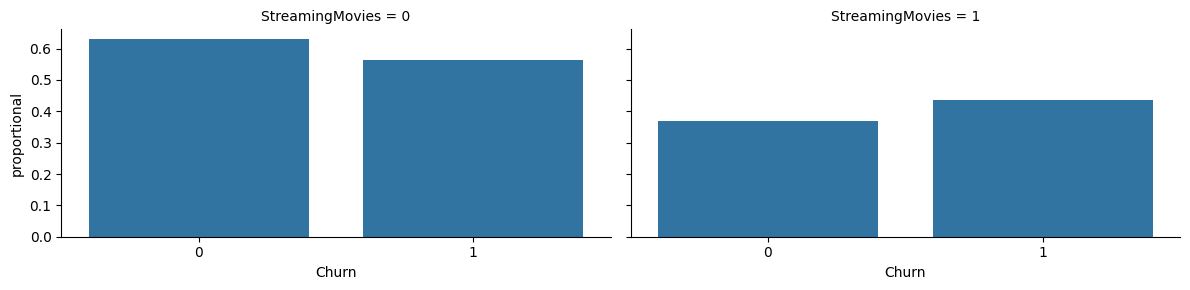

In [17]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[7])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[7])

   Churn        Contract  size  proportional
0      0  Month-to-month  2220      0.429068
1      0        One year  1307      0.252609
2      0        Two year  1647      0.318322
3      1  Month-to-month  1655      0.885500
4      1        One year   166      0.088818
5      1        Two year    48      0.025682


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


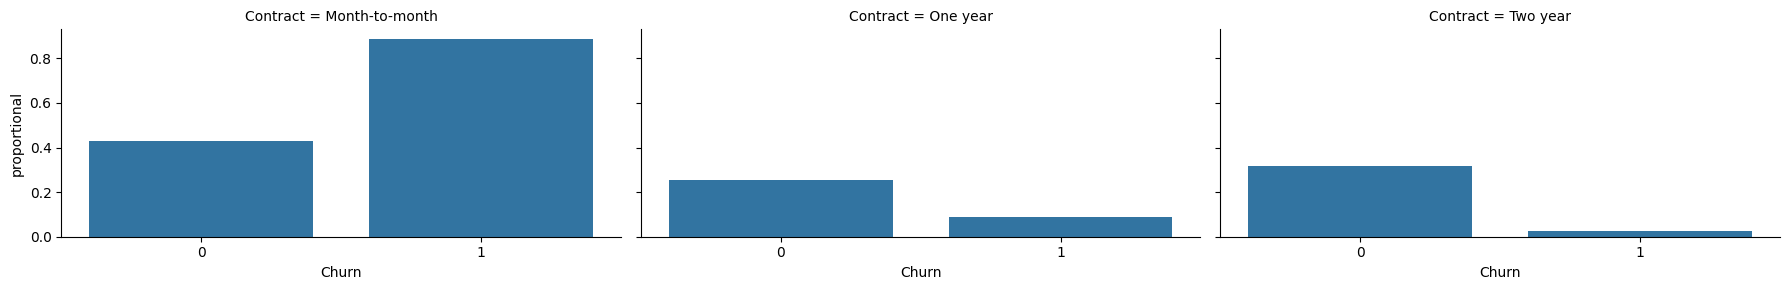

In [18]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[8])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[8])

   Churn  PaperlessBilling  size  proportional
0      0                 0  2403      0.464438
1      0                 1  2771      0.535562
2      1                 0   469      0.250936
3      1                 1  1400      0.749064


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


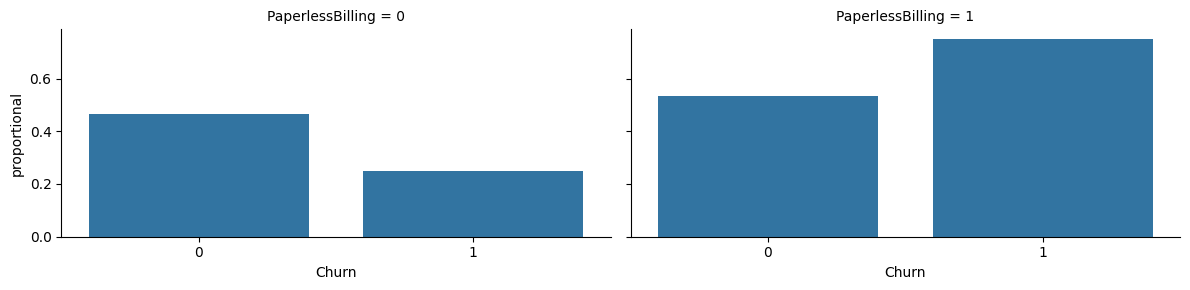

In [19]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[9])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[9])

   Churn              PaymentMethod  size  proportional
0      0  Bank transfer (automatic)  1286      0.248550
1      0    Credit card (automatic)  1290      0.249324
2      0           Electronic check  1294      0.250097
3      0               Mailed check  1304      0.252029
4      1  Bank transfer (automatic)   258      0.138042
5      1    Credit card (automatic)   232      0.124131
6      1           Electronic check  1071      0.573034
7      1               Mailed check   308      0.164794


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


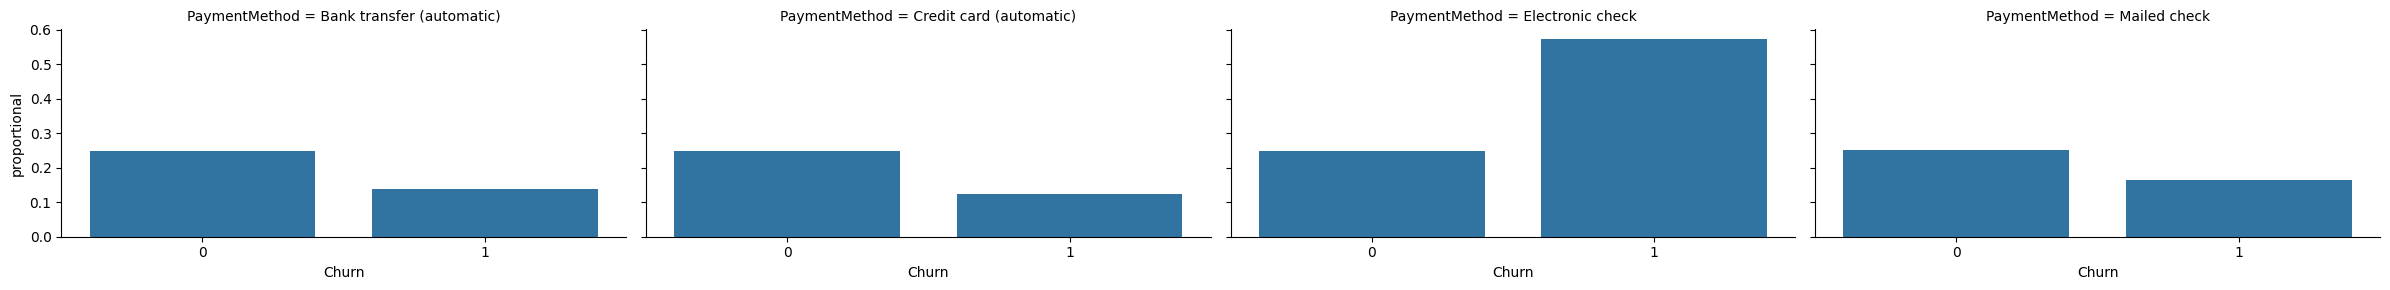

In [20]:
prop_agg=proportional_aggregation(df_cat,'Churn',df_cat.columns[10])
print(prop_agg)
plot_prop(prop_agg,'Churn',df_cat.columns[10])

In [21]:
df_num=df[['MonthlyCharges','tenure','TotalCharges','Churn']]
df_num.head()

,MonthlyCharges,tenure,TotalCharges,Churn
0,29.85,1,29.850000,0
1,56.95,34,1889.500000,0
2,53.85,2,108.150002,1
3,42.30,45,1840.750000,0
4,70.70,2,151.649994,1


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

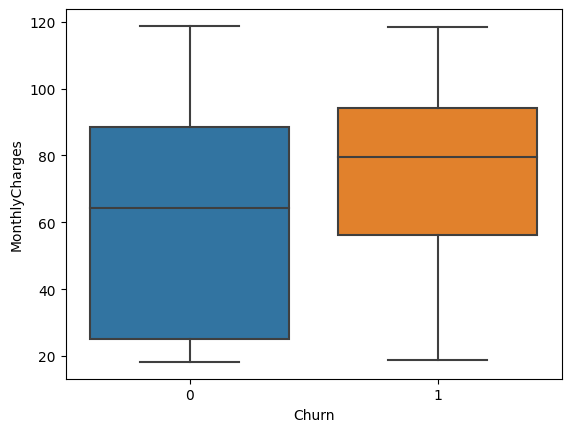

In [22]:
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df_num)

<Axes: xlabel='Churn', ylabel='tenure'>

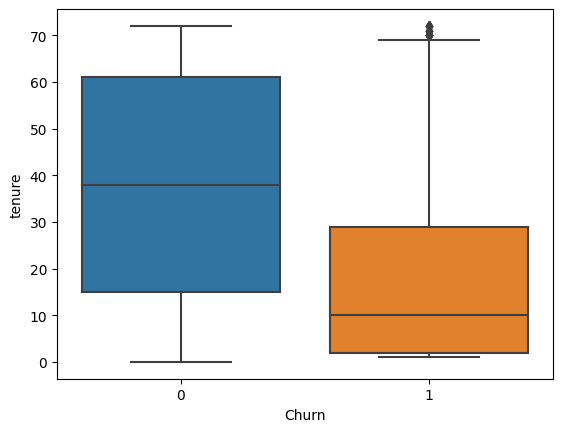

In [23]:
sns.boxplot(x = "Churn", y = "tenure", data = df_num)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

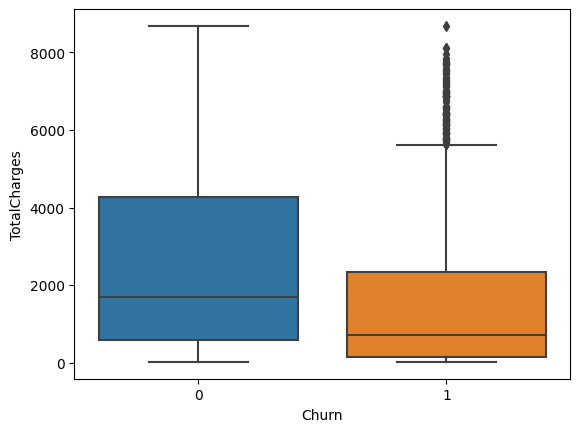

In [24]:
sns.boxplot(x = "Churn", y = "TotalCharges", data = df_num)

# Feature Engineering

## Imputing Missing Values

In [25]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [26]:
print(f"Percentage of missing data: {100 * len(df[df['TotalCharges'].isnull()]) / len(df)}%")

Percentage of missing data: 0.15618344455487718%


In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42, stratify=df.Churn)

In [28]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')
train['TotalCharges'] = imputer.fit_transform(train[['TotalCharges']])
test['TotalCharges'] = imputer.transform(test[['TotalCharges']])
print(train.head())
print(test.head())

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738    Male              0        0           0      35             0   
3151    Male              0        1           1      15             1   
4860    Male              0        1           1      13             0   
3867  Female              0        1           0      26             1   
3810    Male              0        1           1       1             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
3738              0             DSL               0             0   
3151              0     Fiber optic               1             0   
4860              0             DSL               1             1   
3867              0             DSL               0             1   
3810              0             DSL               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
3738                 1            0            1                1   
31

## Encoding

### One Hot Encoding

This time we do one hot encoding to our gender column which seems fitting for One Hot Encoding.

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

# Fit and transform the 'gender' column in the training set
train_encoded = ohe.fit_transform(train[['gender']])

# Transform the 'gender' column in the test set
test_encoded = ohe.transform(test[['gender']])

# Concatenate with the original DataFrames and drop gender column
train = pd.concat([train, pd.DataFrame(ohe.fit_transform(train[['gender']]),
                                       columns=ohe.get_feature_names_out(['gender']),index=train.index)], axis=1)
test = pd.concat([test, pd.DataFrame(ohe.transform(test[['gender']]),
                                     columns=ohe.get_feature_names_out(['gender']),index=test.index)], axis=1)
print(train.head())
print(test.head())

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738    Male              0        0           0      35             0   
3151    Male              0        1           1      15             1   
4860    Male              0        1           1      13             0   
3867  Female              0        1           0      26             1   
3810    Male              0        1           1       1             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
3738              0             DSL               0             0   
3151              0     Fiber optic               1             0   
4860              0             DSL               1             1   
3867              0             DSL               0             1   
3810              0             DSL               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
3738                 1            0            1                1   
31

In [30]:
train.drop(['gender'], axis=1, inplace=True)
test.drop(['gender'], axis=1, inplace=True)
print(train.head())
print(test.head())

      SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
3738              0        0           0      35             0              0   
3151              0        1           1      15             1              0   
4860              0        1           1      13             0              0   
3867              0        1           0      26             1              0   
3810              0        1           1       1             1              0   

     InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
3738             DSL               0             0                 1   
3151     Fiber optic               1             0                 0   
4860             DSL               1             1                 0   
3867             DSL               0             1                 1   
3810             DSL               0             0                 0   

      TechSupport  StreamingTV  StreamingMovies        Contract  \
3738         

### KFold Mean Encoding

Next we do KFold mean encoding for our categorical values. The reason is because mean encoding doesn't fully address well data that doesn't come out too much. It also introduces target leakage. Thereticslly speaking, KFold mean encoding prevents it from occuring.

In [31]:
from sklearn import base
from sklearn.model_selection import KFold

# Define encoder function for training dataset
class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = False, random_state=None)
        col_mean_name = self.colnames + '_' + 'Kfold'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
        if self.discardOriginal_col:
          X = X.drop(self.targetName, axis=1)
        return X

# Define encoder function for test dataset
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, train, colNames, encodedName):
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mean = self.train[[self.colNames, self.encodedName]].groupby(self.colNames).mean().reset_index()

        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        encoded_column = X[self.colNames].map(dd)
        X[self.encodedName] = encoded_column
        return X

for i in train.columns:
    if i in ['InternetService','Contract','PaymentMethod']:
        targetc = KFoldTargetEncoderTrain(i,'Churn',n_fold=5)
        new_train = targetc.fit_transform(train)
        test_targetc = KFoldTargetEncoderTest(new_train,
                                              i,
                                              i+'_Kfold')
        new_test = test_targetc.fit_transform(test)
print(train.head())
# Filter columns in the final train and test DataFrames
train = new_train.drop(['InternetService','Contract','PaymentMethod'], axis=1)
test = new_test.drop(['InternetService','Contract','PaymentMethod'], axis=1)
print(train.head())
print(test.head())

      SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
3738              0        0           0      35             0              0   
3151              0        1           1      15             1              0   
4860              0        1           1      13             0              0   
3867              0        1           0      26             1              0   
3810              0        1           1       1             1              0   

     InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
3738             DSL               0             0                 1   
3151     Fiber optic               1             0                 0   
4860             DSL               1             1                 0   
3867             DSL               0             1                 1   
3810             DSL               0             0                 0   

      TechSupport  StreamingTV  StreamingMovies        Contract  \
3738         

## Scaling

Next we are going to scale our features to prevent many trouble such as booming/shrinking gradient descent. In order to choose between standardscaler or min-maxscaler, we plot the features first.

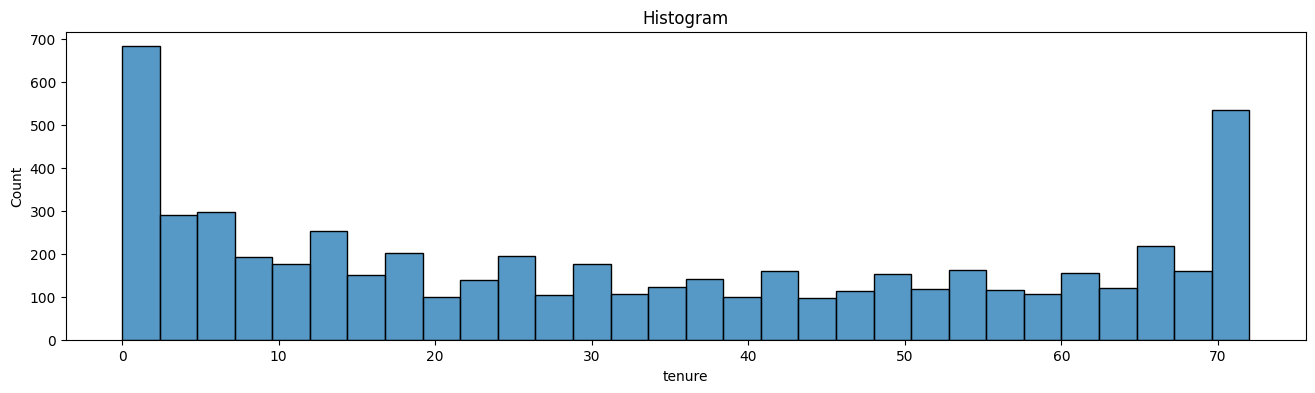

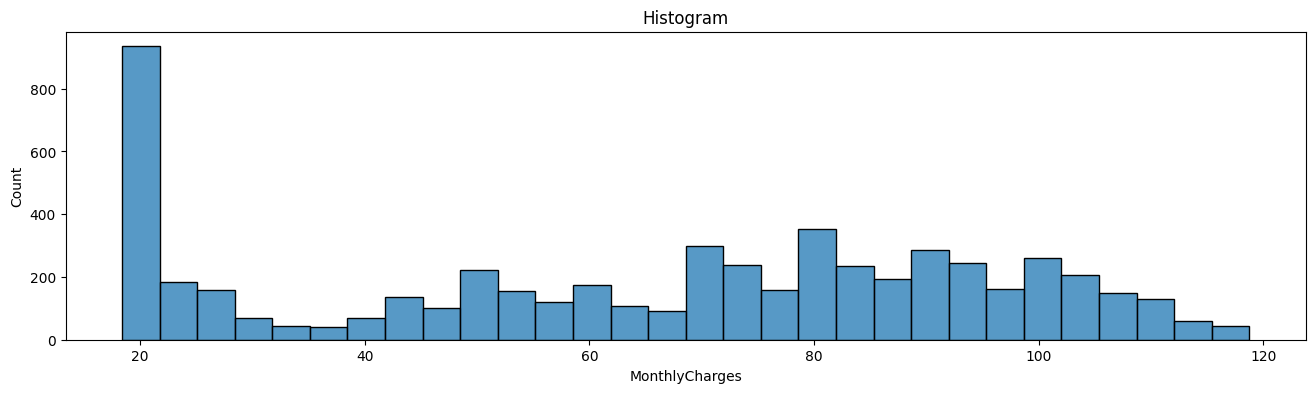

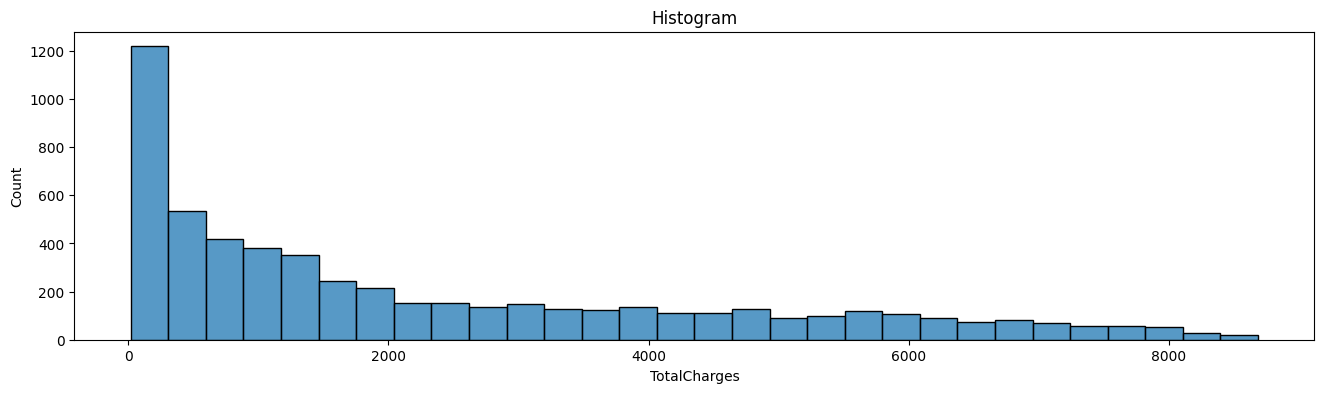

In [32]:
def check_plot(df, variable):
    plt.figure(figsize=(16, 4))
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.show()
for i in ['tenure','MonthlyCharges','TotalCharges']:
  check_plot(train,i)

Apparently for tenure the data followed normal distribution, but not for the totalcharges and monthlycharges. But regardless let's try standardscaler for now.

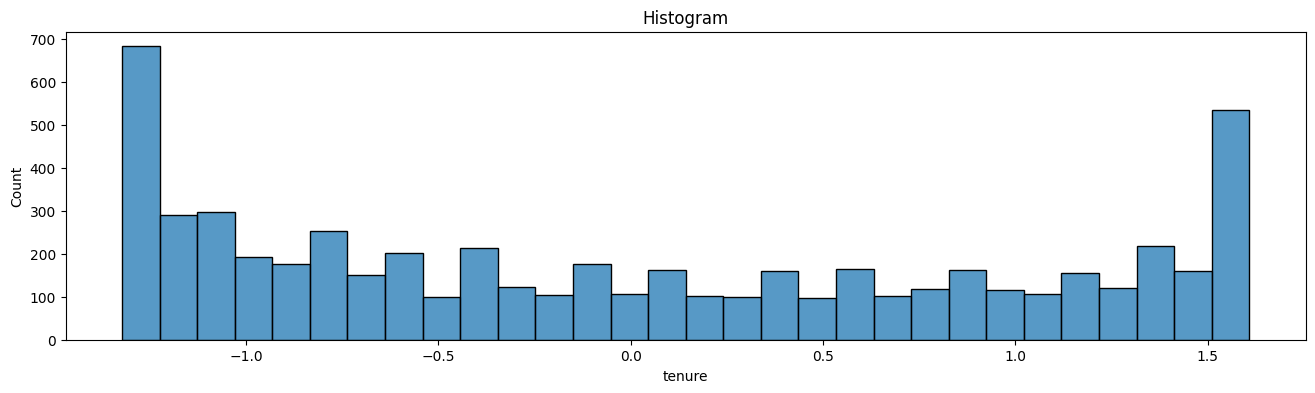

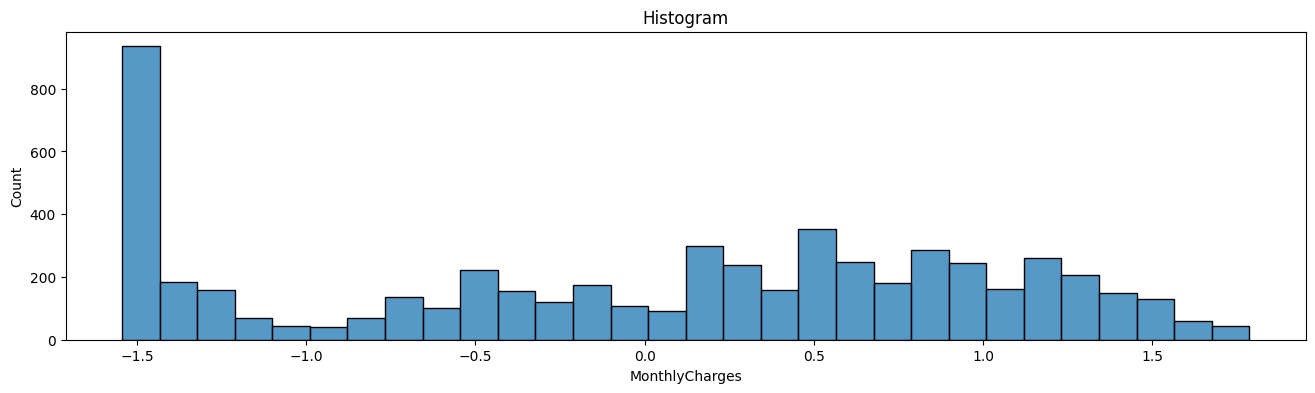

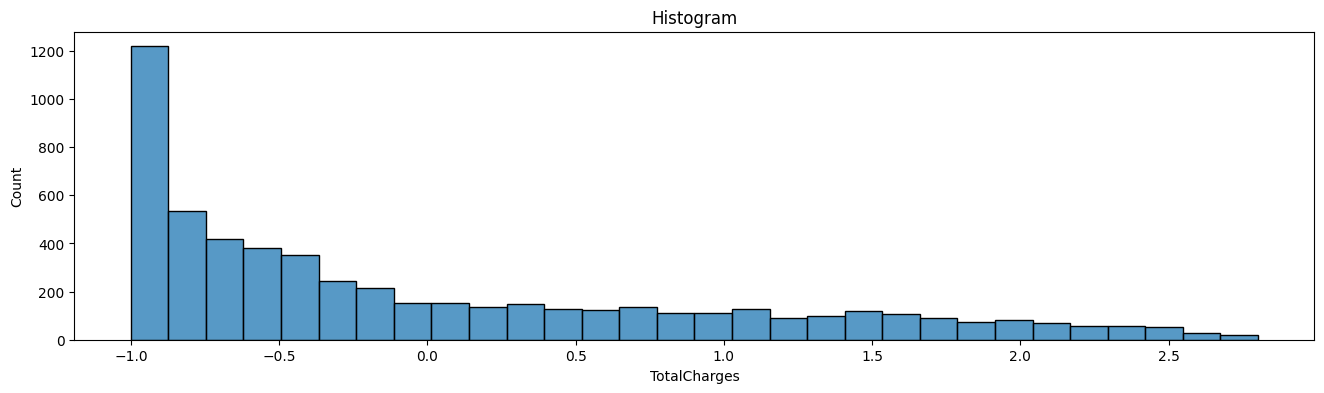

In [33]:
from sklearn.preprocessing import StandardScaler

standardize=StandardScaler()

train[['MonthlyCharges','TotalCharges','tenure']]=standardize.fit_transform(train[['MonthlyCharges','TotalCharges','tenure']])
test[['MonthlyCharges','TotalCharges','tenure']]=standardize.transform(test[['MonthlyCharges','TotalCharges','tenure']])

for i in ['tenure','MonthlyCharges','TotalCharges']:
  check_plot(train,i)

Seems like we have succesfully scaled the data. Now, before splitting our data, we want to know how much the ratio of our target so we can address the correct class_weight in our models.

In [34]:
#checking out the ratio of target values to find out how much class_weight we should address in our models

print(train['Churn'].value_counts(normalize=True))

0    0.734647
1    0.265353
Name: Churn, dtype: float64


In [35]:
#Separate x from y in train and test dataframe
x_train=train.copy()
y_train=x_train.pop('Churn')
x_test=test.copy()
y_test=x_test.pop('Churn')

Next we will go to the new section of building models and the class weight will be allocated accordingly.

# Building Models

We will find the best model that can capture the most potentially churning customers and converting them back into recurring customers. Therefore we will find the model with the best recall. Models that we will compare are:

1. Logistic Regression
2. K-Nearest Neighbors
3. Naive Bayes
4. Support Vector Machine

## 1. Logistic Regression

###Accuracy

In [36]:
!pip install scikit-optimize
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score

# Initiate regression object, class weight refers to the count ratio of each class per total class
logistic_regression = LogisticRegression(random_state = 42, class_weight = {0: train['Churn'].value_counts(normalize=True)[1],
                                                                            1: train['Churn'].value_counts(normalize=True)[0]})

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,1.5],
    'fit_intercept':[False, True],
}

bayes_search = BayesSearchCV(estimator=logistic_regression, search_spaces=param,
                             cv=10,n_jobs=-1,n_iter=30, scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

logistic_regression = LogisticRegression(**bayes_search.best_params_,random_state = 42, class_weight = {0: train['Churn'].value_counts(normalize=True)[1],
                                                                            1: train['Churn'].value_counts(normalize=True)[0]})

# Fit model to training data
logistic_regression.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, logistic_regression.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, logistic_regression.predict(x_test))*100} %" )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Parameter Terbaik: OrderedDict([('C', 1.5), ('fit_intercept', False), ('solver', 'liblinear'), ('tol', 0.01)])
Train Accuracy : 75.82534611288605 %
Test Accuracy : 74.4499645138396 %


Accuracy doesn't look so good. But we shall see how the learning curve is.

### Learning Curve

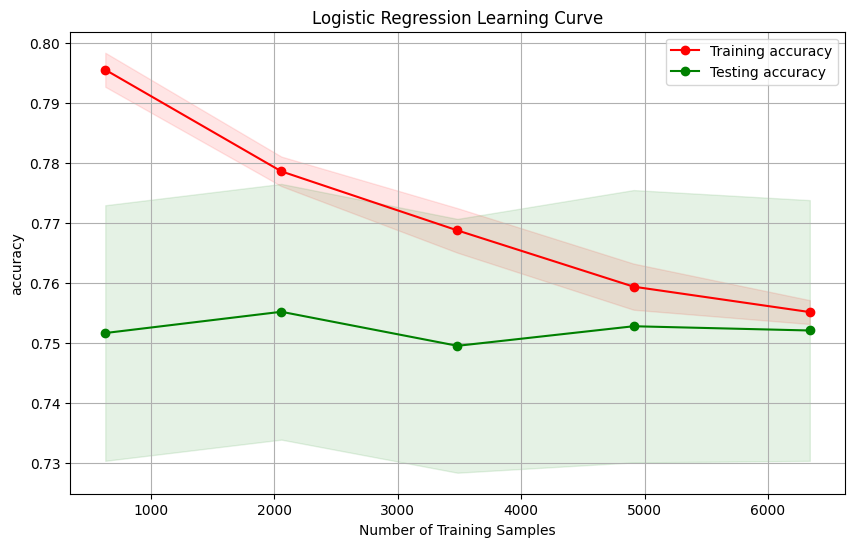

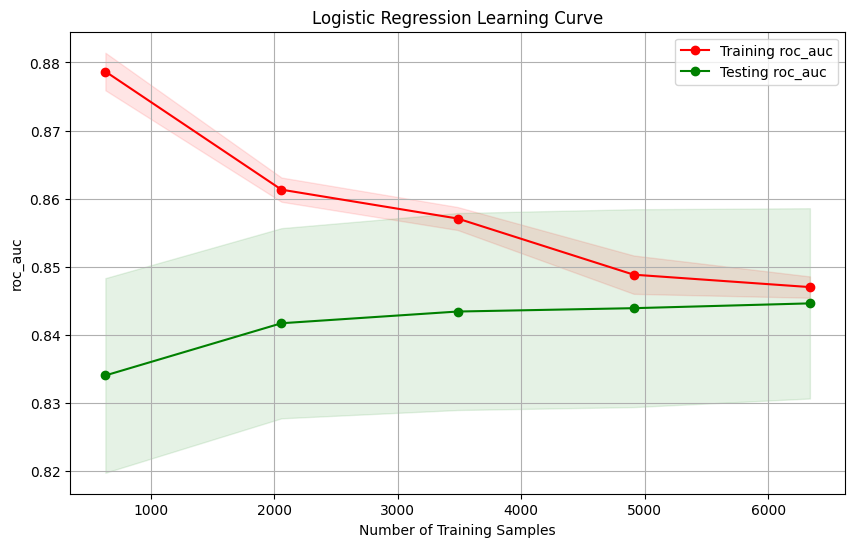

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Combine x_train and x_test to form new dataframe for learning curve plotting
x = pd.concat([x_train, x_test], axis=0)

# Combine y_train and y_test to form new dataframe for learning curve plotting
y = pd.concat([y_train, y_test], axis=0)

# Create learning curve function
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

# plot learning curve
plot_learning_curve_classification(logistic_regression, x, y, cv=10, scoring='accuracy', title="Logistic Regression Learning Curve")
plot_learning_curve_classification(logistic_regression, x, y, cv=10, scoring='roc_auc', title="Logistic Regression Learning Curve")

There is definitely an underfitting in our training data. This is probably because we used bayes search hyperparameter tuning that produced less optimal parameters. Or perhaps our dataset is just not good enough to be fitted to Logistic Regression model.

### Classification Report

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      4139
           1       0.53      0.80      0.64      1495

    accuracy                           0.76      5634
   macro avg       0.72      0.77      0.73      5634
weighted avg       0.81      0.76      0.77      5634

------


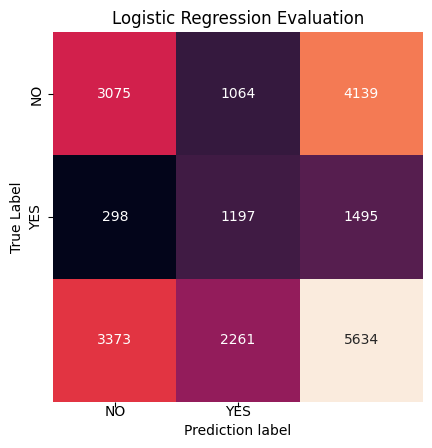

Assuming 1 as positive, we get for Data Train:

True Positive: 1197
True Negative: 3075
False Positive: 1064
False Negative: 298

Accuracy Data Train: 0.7582534611288605
Precision Data Train: 0.5294117647058824
Recall Data Train: 0.8006688963210702
F1-Score Data Train: 0.6373801916932907
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

------


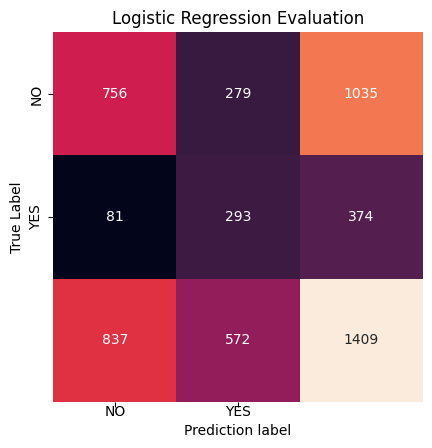

Assuming 1 as positive, we get:

True Positive: 293
True Negative: 756
False Positive: 279
False Negative: 81

Accuracy Data Test: 0.7444996451383961
Precision Data Test: 0.5122377622377622
Recall Data Test: 0.7834224598930482
F1-Score Data Test: 0.6194503171247356


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Define function to calculate our classification report
def evaluate(model, name, x_test = x_test, y_test = y_test, x_train=x_train, y_train=y_train):

    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    matrix = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred_test = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred_test))
    print('------')
    matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred_test))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

# Get our classification report
evaluate(logistic_regression, 'Logistic Regression Evaluation')

The recall is only 0.78 and so far doesn't look very promising.

## K-Nearest Neighbours

### Accuracy

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Find optimum n_neighbor
error = []
for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds!=y_test))
n_neighbor = error.index(np.min(error))+1
print(f'optimum n_neighbor: {n_neighbor}')

# Apply hyperparameter tuning to find optimum other parameters
param = {
    'p':[1.0,1.5,2.0],
    'leaf_size': [20,30,40],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier(n_neighbors=n_neighbor)
bayes_search = BayesSearchCV(estimator=knn, search_spaces=param,
                             cv=10,n_jobs=-1,n_iter=30,scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
knn = KNeighborsClassifier(**bayes_search.best_params_,n_neighbors=n_neighbor)
knn.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, knn.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, knn.predict(x_test))*100} %" )

optimum n_neighbor: 30


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Parameter Terbaik: OrderedDict([('algorithm', 'ball_tree'), ('leaf_size', 30), ('p', 1.0)])
Train Accuracy : 81.09691160809372 %
Test Accuracy : 79.4180269694819 %


KNN seems to perform better than logistic regression. Perhaps because the tuning were done properly. We shall see the learning curve and the recall.

### Learning Curve

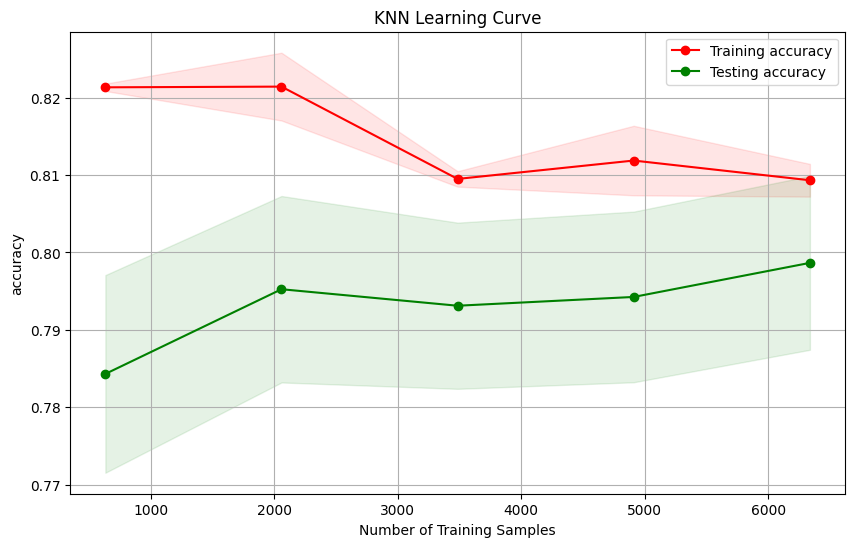

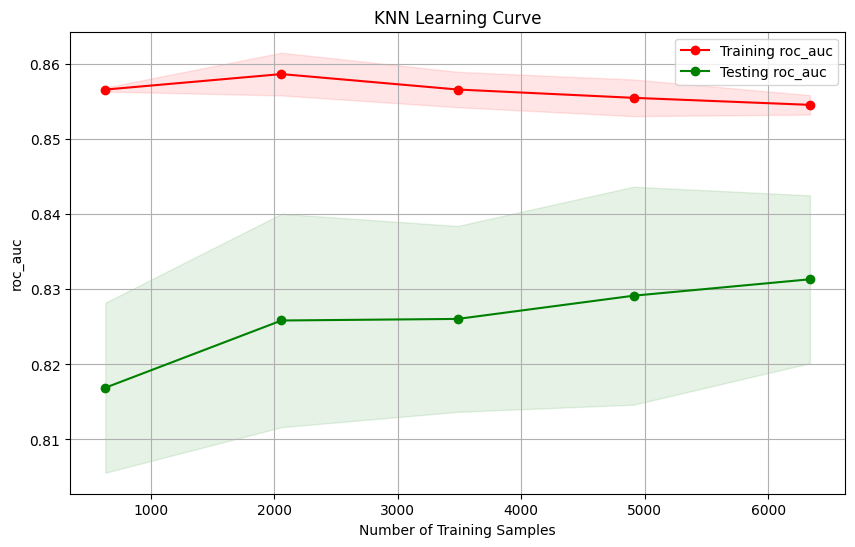

In [40]:
# plot learning curve
plot_learning_curve_classification(knn, x, y, cv=10, scoring='accuracy', title="KNN Learning Curve")
plot_learning_curve_classification(knn, x, y, cv=10, scoring='roc_auc', title="KNN Learning Curve")

Learning curve is doing well, no underfitting or overfitting occured.

### Classification Report

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4139
           1       0.68      0.54      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634

------


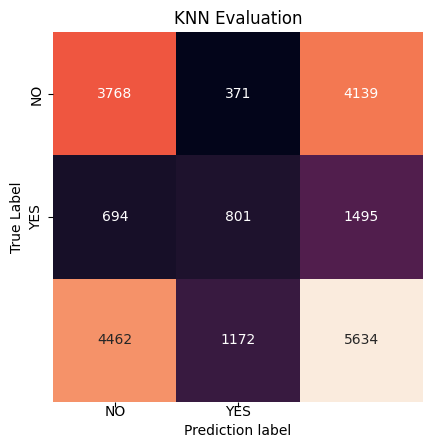

Assuming 1 as positive, we get for Data Train:

True Positive: 801
True Negative: 3768
False Positive: 371
False Negative: 694

Accuracy Data Train: 0.8109691160809371
Precision Data Train: 0.6834470989761092
Recall Data Train: 0.5357859531772575
F1-Score Data Train: 0.6006749156355455
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

------


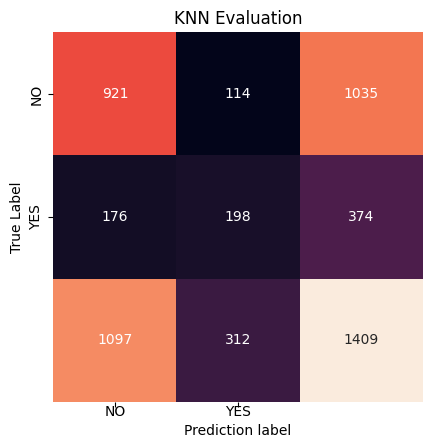

Assuming 1 as positive, we get:

True Positive: 198
True Negative: 921
False Positive: 114
False Negative: 176

Accuracy Data Test: 0.794180269694819
Precision Data Test: 0.6346153846153846
Recall Data Test: 0.5294117647058824
F1-Score Data Test: 0.577259475218659


In [41]:
# Get our classification report
evaluate(knn, 'KNN Evaluation')

But the recall is only 0.53. This model perform better in detecting non-churning customers but it underperforms when it comes to finding churning customers.

## Naive Bayes

### Accuracy

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_model = GaussianNB()


# Apply hyperparameter tuning to find optimum other parameters
param = {'priors':[[0.03,0.97],[0.04,0.96],[0.05,0.95],[0.1,0.9]],
    'var_smoothing':[1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8]
}
naive_model = GaussianNB()
grid_search = GridSearchCV(estimator=naive_model, param_grid=param,
                             cv=10,n_jobs=-1,scoring='roc_auc')
grid_search.fit(x_train, y_train)
print("Parameter Terbaik:", grid_search.best_params_)

# Fit the model
naive_model = GaussianNB(**grid_search.best_params_)
naive_model.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, naive_model.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, naive_model.predict(x_test))*100} %" )

Parameter Terbaik: {'priors': [0.03, 0.97], 'var_smoothing': 1e-14}
Train Accuracy : 63.507277245296414 %
Test Accuracy : 64.44286728176012 %


The accuracy doesn't look really well. But in the case of finding churning customers (true positive), that might be alright. Now we shall see the learning curve and the recall.

### Learning Curve

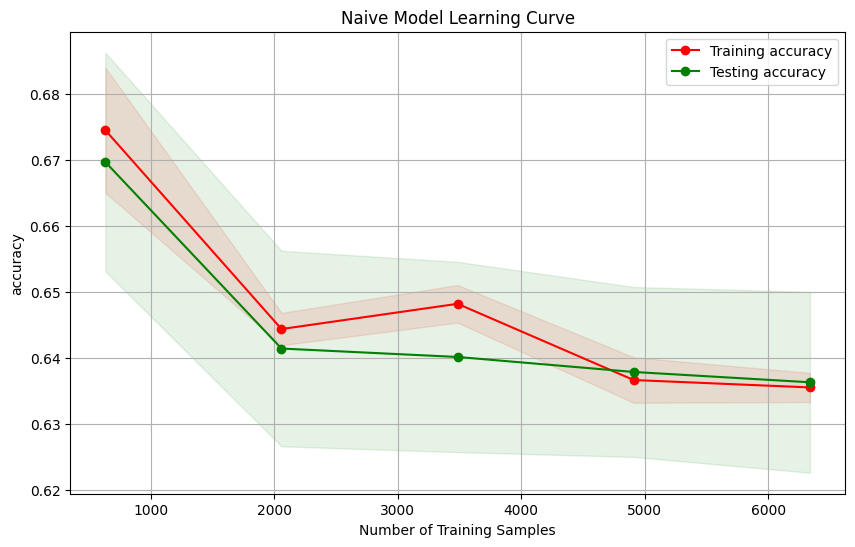

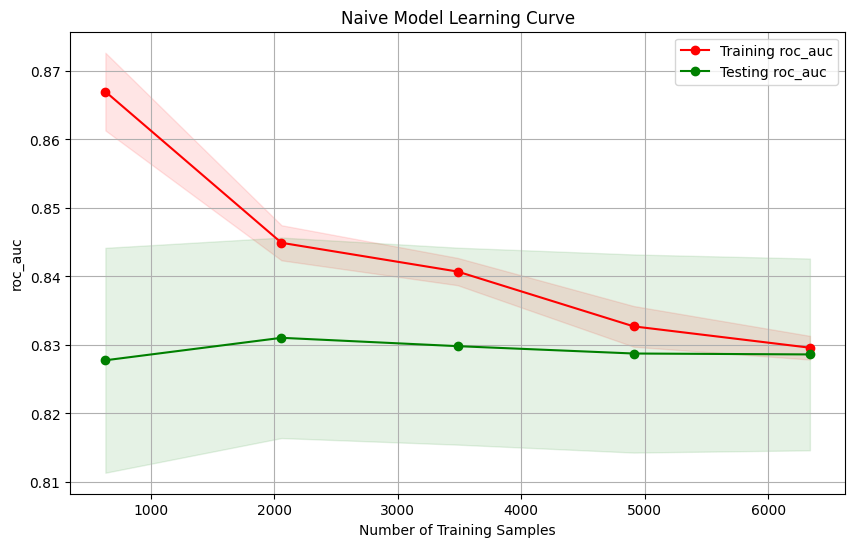

In [43]:
# plot learning curve
plot_learning_curve_classification(naive_model, x, y, cv=10, scoring='accuracy', title="Naive Model Learning Curve")
plot_learning_curve_classification(naive_model, x, y, cv=10, scoring='roc_auc', title="Naive Model Learning Curve")

### Classification Report

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      0.54      0.68      4139
           1       0.41      0.91      0.57      1495

    accuracy                           0.64      5634
   macro avg       0.68      0.72      0.63      5634
weighted avg       0.80      0.64      0.65      5634

------


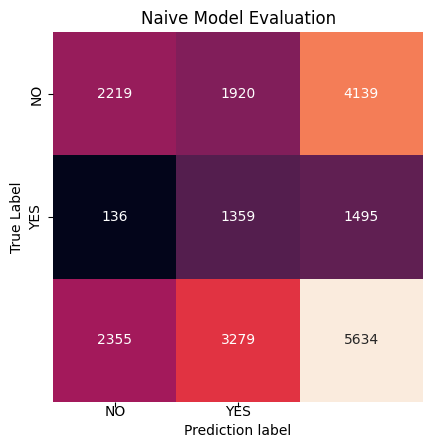

Assuming 1 as positive, we get for Data Train:

True Positive: 1359
True Negative: 2219
False Positive: 1920
False Negative: 136

Accuracy Data Train: 0.6350727724529641
Precision Data Train: 0.41445562671546204
Recall Data Train: 0.9090301003344482
F1-Score Data Train: 0.569333891914537
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      0.55      0.69      1035
           1       0.42      0.92      0.58       374

    accuracy                           0.64      1409
   macro avg       0.68      0.73      0.64      1409
weighted avg       0.81      0.64      0.66      1409

------


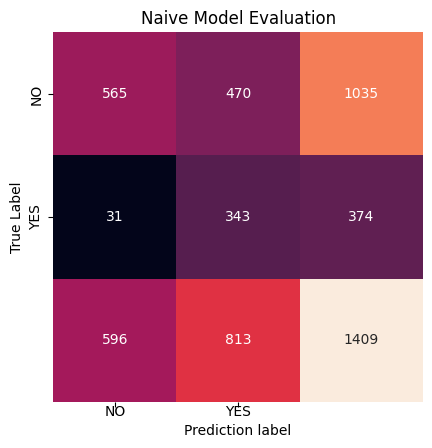

Assuming 1 as positive, we get:

True Positive: 343
True Negative: 565
False Positive: 470
False Negative: 31

Accuracy Data Test: 0.6444286728176012
Precision Data Test: 0.4218942189421894
Recall Data Test: 0.9171122994652406
F1-Score Data Test: 0.5779275484414491


In [44]:
# Get our classification report
evaluate(naive_model, 'Naive Model Evaluation')

The recall for naive bayes model is so high which is at 0.92. This means that our naive model have became specially good in detecting churning customers, which falls in line with our policy.

## Support Vector Machine

### Accuracy

In [45]:
from sklearn.svm import SVC

svc = SVC(random_state = 42, class_weight = {0: df['Churn'].value_counts(normalize=True)[1],
                                                     1: df['Churn'].value_counts(normalize=True)[0]})

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5,1,1.5],
    'degree':[2,3,4,5,6],
    'coef0':[0.0,0.5,1.0,2.0]
}

bayes_search = BayesSearchCV(estimator=svc, search_spaces=param,
                             cv=10,n_jobs=-1, n_iter=30, scoring='roc_auc')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
svc = SVC(**bayes_search.best_params_,random_state = 42,
                  class_weight = {0: df['Churn'].value_counts(normalize=True)[1],
                                  1: df['Churn'].value_counts(normalize=True)[0]})
svc.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, svc.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, svc.predict(x_test))*100} %" )

Parameter Terbaik: OrderedDict([('C', 0.5), ('coef0', 1.0), ('degree', 6), ('kernel', 'linear'), ('tol', 0.01)])
Train Accuracy : 74.47639332623358 %
Test Accuracy : 73.52732434350602 %


Again, accuracy might not matter much in churn customer case. As we just saw in KNN great accuracy, but underwhelming recall.

### Learning Curve

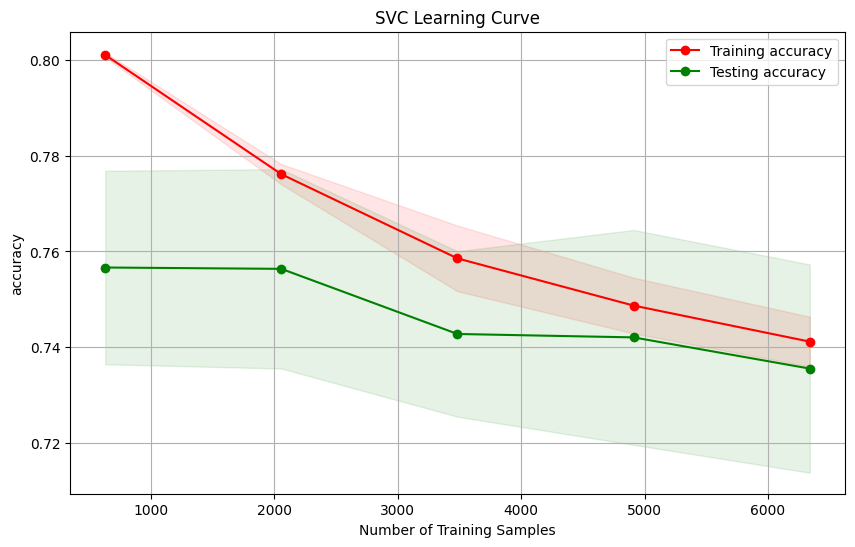

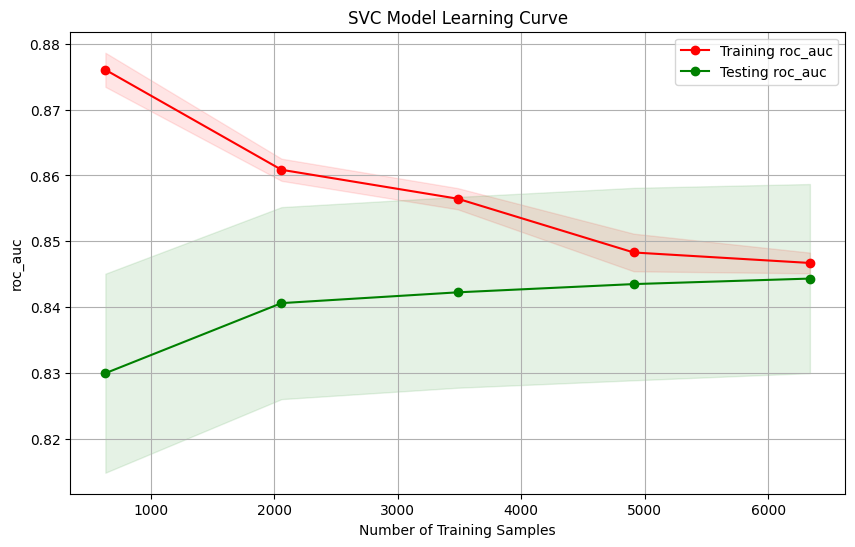

In [46]:
# plot learning curve
plot_learning_curve_classification(svc, x, y, cv=10, scoring='accuracy', title="SVC Learning Curve")
plot_learning_curve_classification(svc, x, y, cv=10, scoring='roc_auc', title="SVC Model Learning Curve")

The model also underfitted very much. Perhaps the tuning is not properly done, or the dataset is not compatible with support vector machine.

### Classification Report

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      4139
           1       0.51      0.81      0.63      1495

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.81      0.74      0.76      5634

------


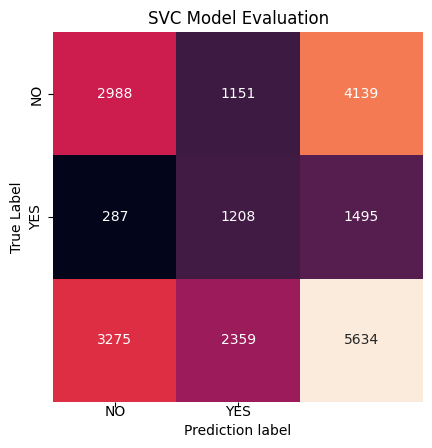

Assuming 1 as positive, we get for Data Train:

True Positive: 1208
True Negative: 2988
False Positive: 1151
False Negative: 287

Accuracy Data Train: 0.7447639332623358
Precision Data Train: 0.5120813904196694
Recall Data Train: 0.8080267558528428
F1-Score Data Train: 0.6268811624286456
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

------


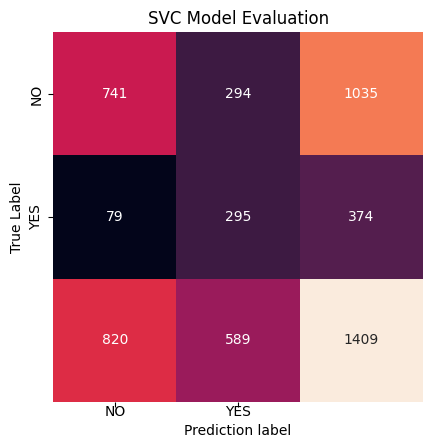

Assuming 1 as positive, we get:

True Positive: 295
True Negative: 741
False Positive: 294
False Negative: 79

Accuracy Data Test: 0.7352732434350603
Precision Data Test: 0.5008488964346349
Recall Data Test: 0.7887700534759359
F1-Score Data Test: 0.612668743509865


In [47]:
# Get our classification report
evaluate(svc, 'SVC Model Evaluation')

And the recall is only 0.79. So far our naive bayes model still has the highest recall at 0.92.

# Model Conclusion

We will be using naive bayes model with 0.92 recall which hopefully can capture as much churning customers as possible.

Cumulative gain at 40%: 0.7647058823529411


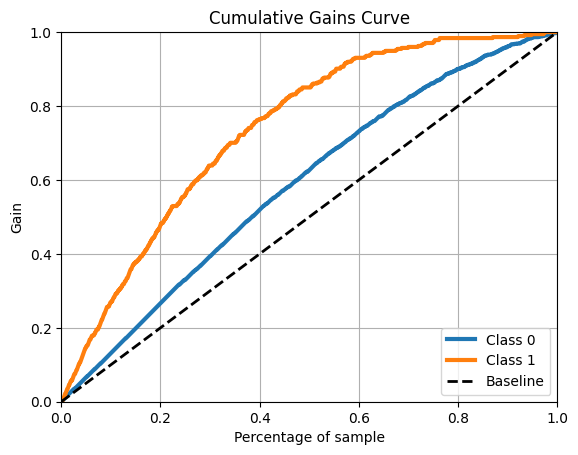

In [50]:
!pip install scikit-plot
import scikitplot as skplt

# Plot cumulative gain
ax = skplt.metrics.plot_cumulative_gain(y_test, naive_model.predict_proba(x_test))
# Access the cumulative gain values and percentages from the plot
lines = ax.lines
line = lines[1]  # Use the line that correlates to churn (orange line)
x_values = line.get_xdata()  # X-axis values (percentages)
y_values = line.get_ydata()  # Y-axis values (cumulative gain)
index_at_40_percent = min(range(len(x_values)), key=lambda i: abs(x_values[i] - 0.4))
cumulative_gain_at_40_percent = y_values[index_at_40_percent]
print(f"Cumulative gain at 40%: {cumulative_gain_at_40_percent}")

In [51]:
population_pred_nb = pd.DataFrame(naive_model.predict(x_test))
population_pred_nb.value_counts()

1    813
0    596
dtype: int64

In [52]:
# Assuming treatment cost per customer= IDR 300000
# Aiming for 20% margin

treat=813*0.4
saved_with_model=treat*cumulative_gain_at_40_percent
failed_with_model=treat-saved_with_model
cost=treat*300000
profit_with_model=cost*0.2*saved_with_model
netto_with_model=profit_with_model-cost
print(f'saved with model:{saved_with_model} customers')
print(f'failed with model:{failed_with_model} customers')
print(f'profit with model:IDR {profit_with_model}')
print(f'netto with model:IDR {netto_with_model}')
saved_without_model=treat*0.4
failed_without_model=treat-saved_without_model
profit_without_model=cost*0.2*saved_without_model
netto_without_model=profit_without_model-cost
print(f'saved without model:{saved_without_model} customers')
print(f'failed without model:{failed_without_model} customers')
print(f'profit without model: IDR {profit_without_model}')
print(f'netto without model:IDR {netto_without_model}')

saved with model:248.68235294117648 customers
failed with model:76.51764705882357 customers
profit with model:IDR 4852290070.588236
netto with model:IDR 4754730070.588236
saved without model:130.08 customers
failed without model:195.12000000000003 customers
profit without model: IDR 2538120960.000001
netto without model:IDR 2440560960.000001


# Conclusion

This is one model where we know how much money we are going to save but don't know how much needed capital as the treatment capital was only assumed to be IDR 300000 per customer. However, our model yielded so good result now that by spending IDR 100 M, we saved IDR 4.75 B. Even if the treatment capital happened to be twice as high (IDR 600000/cust), we will spend IDR 200 M and still saved IDR 4.65 B. And if the treatment caoital is 10 times as high (IDR 3000000/cust), we still saved IDR 3.85 B. Therefore, naive bayes model with high recall truly saved us when other models failed.